<a href="https://colab.research.google.com/github/positron1253/crop-recommendation/blob/main/croprecomendation%20new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/MyDrive/Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [ ]:
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# prompt: create new df with 120 rows of each lable

import pandas as pd
new_df = pd.DataFrame()
for label in df['label'].unique():
  temp_df = df[df['label'] == label].sample(n=120, replace=True)
  new_df = pd.concat([new_df, temp_df])

print(new_df.shape)


(2640, 8)


In [ ]:
df=new_df

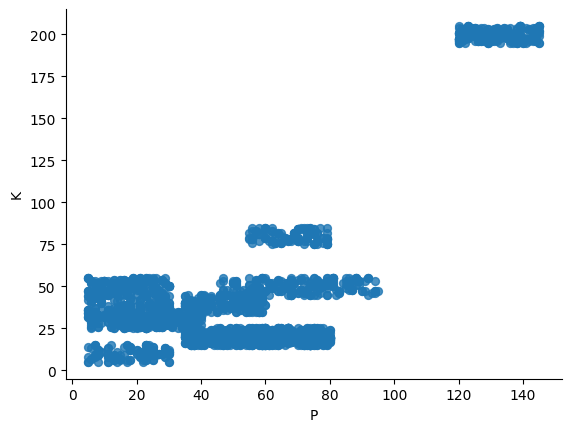

In [ ]:
# @title P vs K

from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='P', y='K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

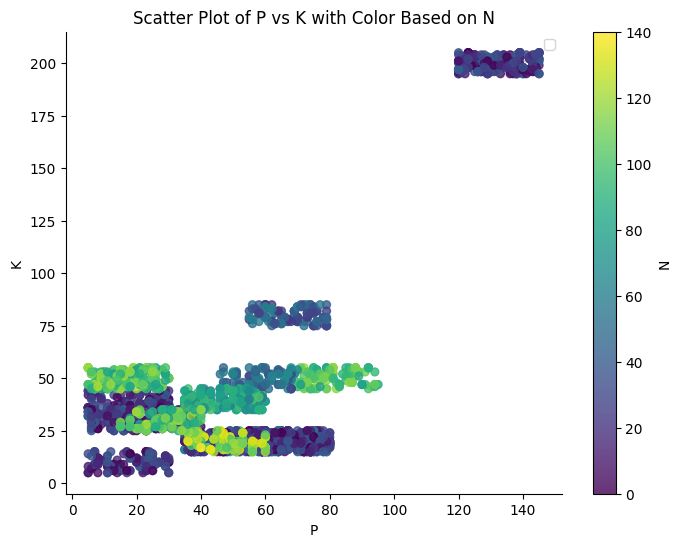

In [ ]:
# prompt: add multiple colors to above graphs

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')




# @title P vs K

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
colors = ['blue', 'green', 'red', 'orange', 'purple'] # Add more colors as required

# Assign a color to each unique label (assuming you have a 'label' column in your data)
# If you don't have a label column, replace 'label' with the name of your categorical column
# unique_labels = df['label'].unique()
# label_to_color = {label: color for label, color in zip(unique_labels, colors)}

# Iterate through groups of data and plot each group with its corresponding color
# for label in unique_labels:
#     data_subset = df[df['label'] == label]
#     plt.scatter(data_subset['P'], data_subset['K'], label=label, color=label_to_color[label], s=32, alpha=.8)


# For simplicity, assuming you don't have a label column or want to plot a specific way
plt.scatter(new_df['P'], new_df['K'], c=new_df['N'], cmap='viridis', s=32, alpha=.8)


plt.gca().spines[['top', 'right']].set_visible(False)

plt.xlabel('P')
plt.ylabel('K')
plt.title('Scatter Plot of P vs K with Color Based on N')
plt.colorbar(label='N')
plt.legend()  # Show legend for labels if you are using them
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

plt.savefig('p_vs_k_scatter_plot.png')
files.download('p_vs_k_scatter_plot.png') # files is now defined and can be used

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

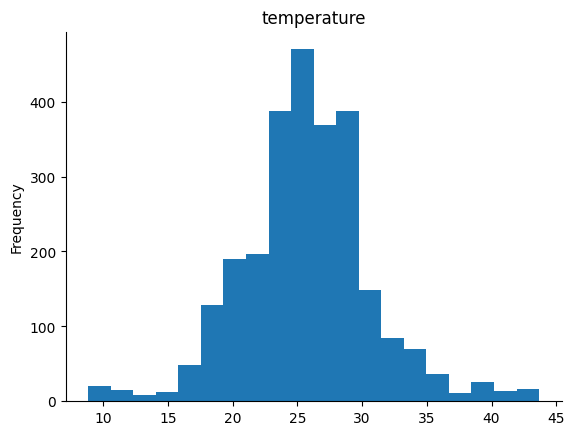

In [ ]:
# @title temperature

from matplotlib import pyplot as plt
df['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

import altair as alt

# Assuming you have a scatter plot already created
# Replace this with the actual scatter plot code
chart = alt.Chart(new_df).mark_circle().encode(
    x='rainfall',
    y='temperature',
    color='label'  # Add color encoding based on 'label' column
)

chart


alt.Chart(...)

In [ ]:
# prompt: higher resolution of rainfall temp graph also increase lable size

chart = alt.Chart(new_df).mark_circle(size=60).encode(
    x='rainfall',
    y='temperature',
    color='label',
    tooltip=['label', 'rainfall', 'temperature']  # Add tooltip for interactivity
).properties(
    width=1000,  # Increase width
    height=800  # Increase height
).configure_axis(
    labelFontSize=20,  # Increase label font size
    titleFontSize=22
).configure_legend(
    labelFontSize=20,
    titleFontSize=22
)

chart


alt.Chart(...)

In [ ]:

chart = alt.Chart(new_df).mark_circle().encode(
    x='humidity',
    y='temperature',
    color='label'  # Add color encoding based on 'label' column
)

chart


alt.Chart(...)

In [ ]:


chart = alt.Chart(new_df).mark_circle(size=60).encode(
    x='humidity',
    y='temperature',
    color='label',
    tooltip=['label', 'rainfall', 'temperature']  # Add tooltip for interactivity
).properties(
    width=1000,  # Increase width
    height=800  # Increase height
).configure_axis(
    labelFontSize=20,  # Increase label font size
    titleFontSize=22
).configure_legend(
    labelFontSize=20,
    titleFontSize=22
)

chart

alt.Chart(...)

In [ ]:

chart = alt.Chart(new_df).mark_circle().encode(
    x='humidity',
    y='rainfall',
    color='label'  # Add color encoding based on 'label' column
).properties(
    width=1000,  # Adjust width as needed
    height=600  # Adjust height as needed)
)
chart

alt.Chart(...)

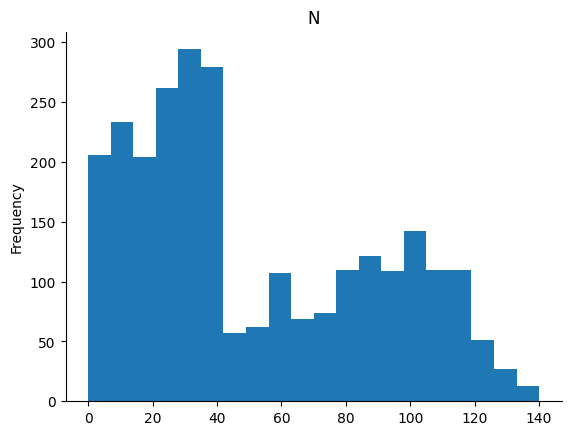

In [ ]:
# @title N

from matplotlib import pyplot as plt
df['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape
df.tail()


,N,P,K,temperature,humidity,ph,rainfall,label
2126,86,26,27,27.131404,52.893683,6.081173,192.428038,coffee
2102,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
2162,118,40,35,26.350342,58.506502,7.460175,121.558630,coffee
2124,108,33,31,23.692871,66.760901,7.393826,144.657642,coffee
2172,111,29,31,26.059684,52.310985,6.136287,161.343254,coffee


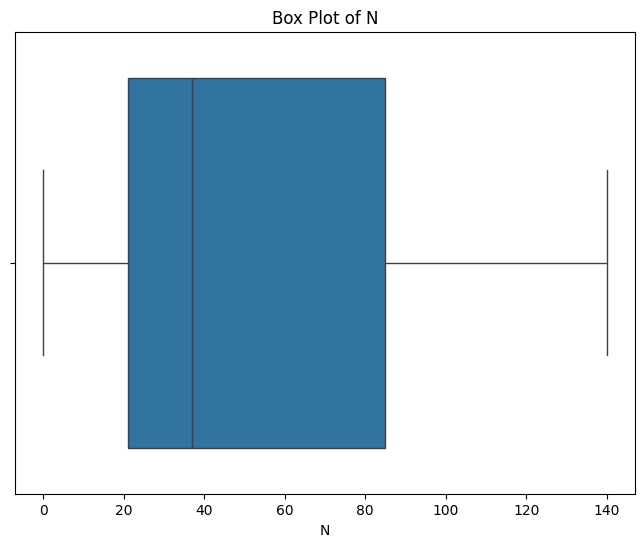

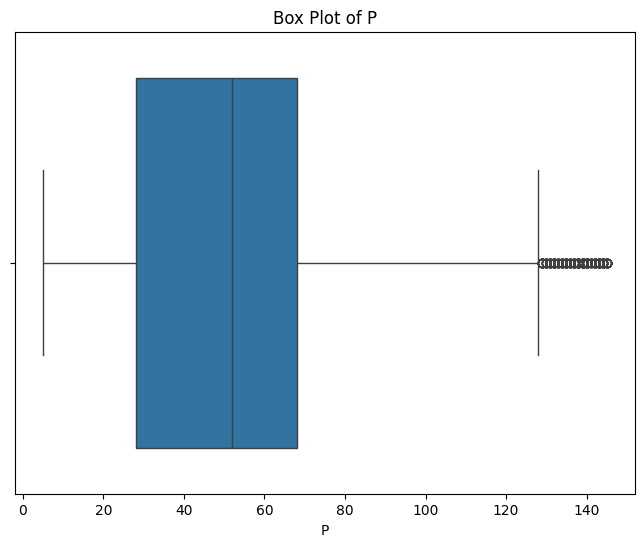

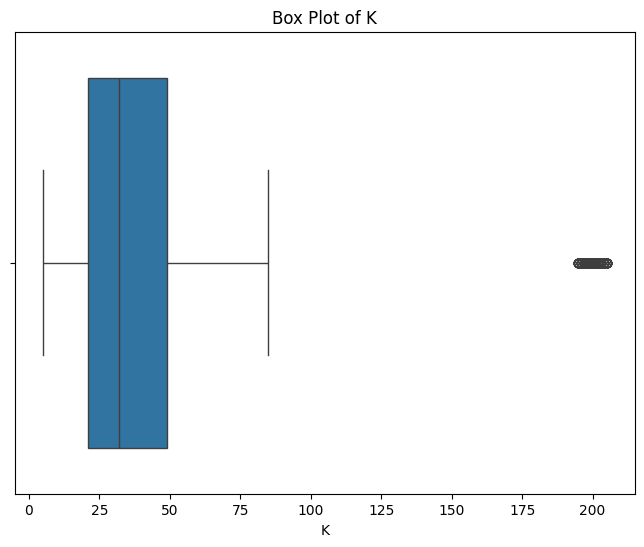

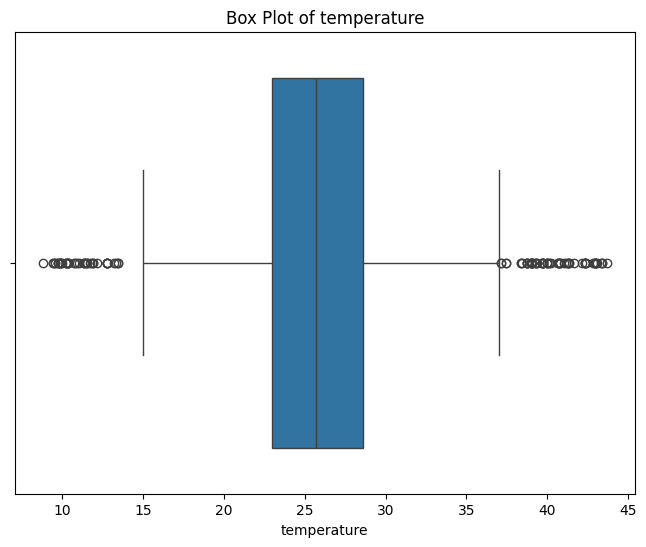

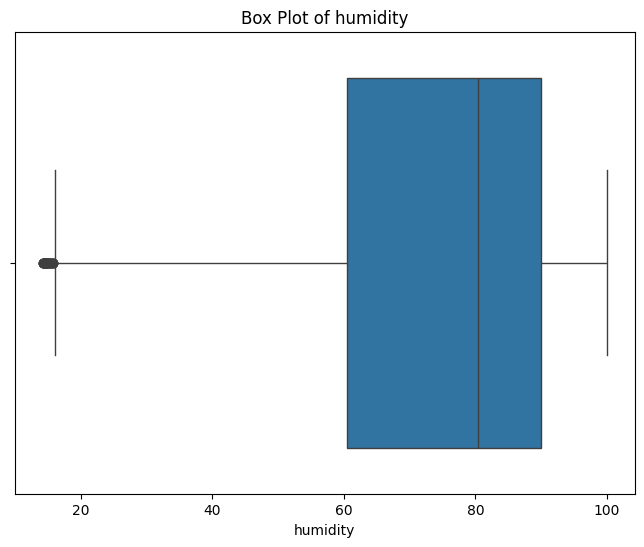

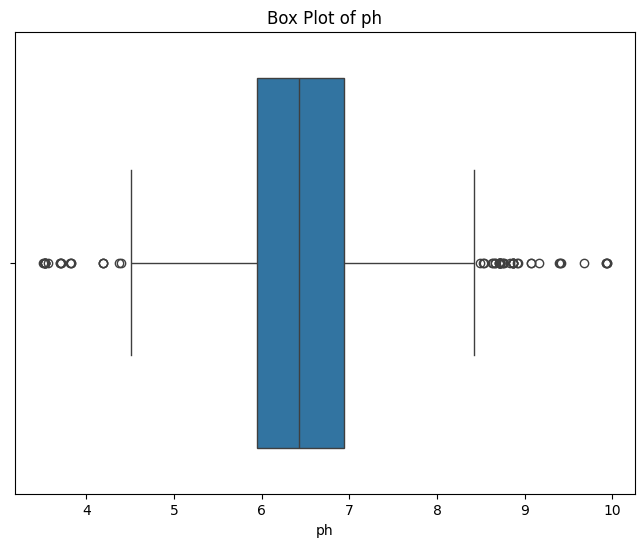

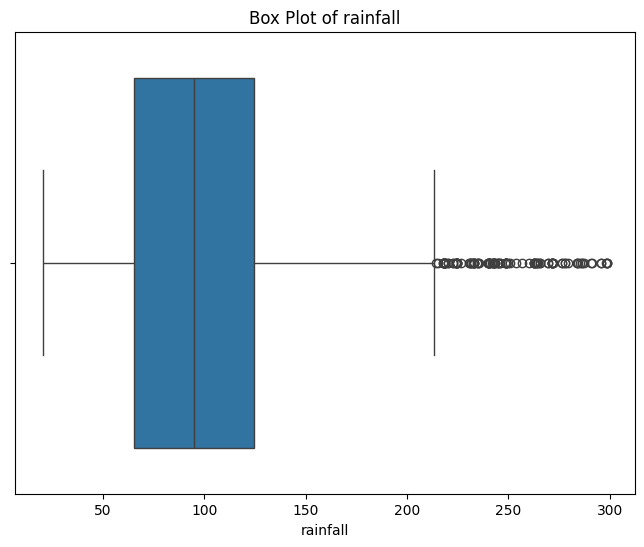

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()


In [ ]:
df.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
print("the unique labels are :-")
df['label'].unique()

the unique labels are :-


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

,count
label,
rice,120
maize,120
jute,120
cotton,120
coconut,120
papaya,120
orange,120
apple,120
muskmelon,120


In [ ]:
# prompt: create lablle map with df lable

label_map = {label: i for i, label in enumerate(df['label'].unique())}
label_map

{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

In [ ]:
# prompt: encode all labels

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
18,77,38,36,21.865252,80.192301,5.953933,224.555017,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
60,72,40,38,20.414470,82.208026,7.592491,245.151130,20
22,67,59,41,21.947667,80.973842,6.012633,213.356092,20
40,62,42,36,22.781338,82.067191,6.430010,248.718323,20


<Axes: >

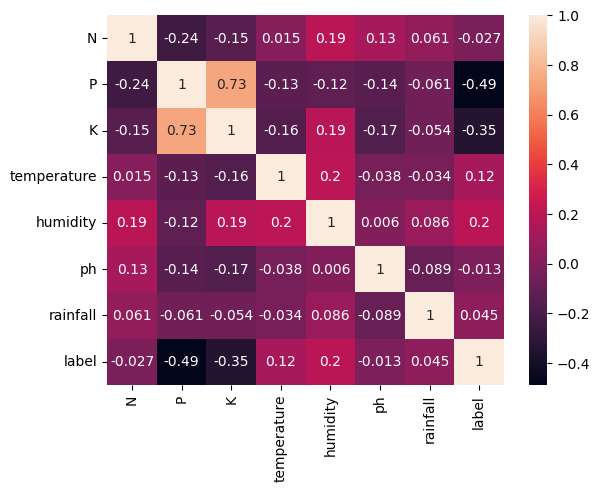

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
feat = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
results = df['label']
labels = df['label']

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(feat,results,test_size = 0.2,random_state =2)

decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  94.50757575757575
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        20
           2       0.80      1.00      0.89        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        33
           5       1.00      0.69      0.81        16
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        23
           8       1.00      0.35      0.52        20
           9       1.00      0.88      0.94        17
          10       0.92      0.96      0.94        24
          11       0.75      0.95      0.84        22
          12       1.00      0.94      0.97        18
          13       0.94      0.71      0.81        21
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        27
          16       1.00      1.00

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
val = cross_val_score(DecisionTree, feat, results,cv=5)
val

array([0.93560606, 0.91666667, 0.92992424, 0.91098485, 0.92992424])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        20
           2       0.83      0.95      0.88        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        33
           5       1.00      0.94      0.97        16
           6       0.78      0.97      0.87        30
           7       1.00      1.00      1.00        23
           8       0.79      0.95      0.86        20
           9       0.94      1.00      0.97        17
          10       1.00      0.92      0.96        24
          11       0.93      0.64      0.76        22
          12       1.00      1.00      1.00        18
          13       0.95      0.86      0.90        21
          14       0.96      1.00      0.98        26
          15       1.00      1.00      1.00        27
          16       1.00   

In [ ]:
score = cross_val_score(LogReg,feat,results,cv=5)
score

array([0.95833333, 0.96969697, 0.97348485, 0.96780303, 0.96590909])

In [ ]:
import pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

random forsest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9962121212121212
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        23
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        27
          16       1.00      1.00      1.00

In [ ]:
score = cross_val_score(RF,feat,results,cv=5)
score

array([0.99621212, 0.99810606, 1.        , 0.99810606, 0.99810606])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
import os
print(os. getcwd())
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

/content


naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9962121212121212
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        23
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        27
          16       1.00      1.00 

In [ ]:
score = cross_val_score(NaiveBayes,feat,results,cv=5)
score

array([0.99621212, 0.99621212, 0.99621212, 0.99621212, 0.99621212])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

Support Vector Machine

In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.6685606060606061
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        22
           1       1.00      0.60      0.75        20
           2       1.00      0.60      0.75        20
           3       1.00      0.62      0.76        26
           4       1.00      0.70      0.82        33
           5       1.00      0.75      0.86        16
           6       1.00      0.67      0.80        30
           7       1.00      0.65      0.79        23
           8       1.00      0.60      0.75        20
           9       1.00      0.53      0.69        17
          10       1.00      0.58      0.74        24
          11       1.00      0.68      0.81        22
          12       1.00      0.78      0.88        18
          13       0.11      1.00      0.19        21
          14       1.00      0.42      0.59        26
          15       1.00      0.78      0.88        27
          16       1.00      0.74      0.8

In [ ]:

from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(Xtrain, Ytrain)

# Make predictions on the test set
predicted_values = xgb_model.predict(Xtest)

# Evaluate the model
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))

# You can also perform cross-validation with XGBoost
score = cross_val_score(xgb_model, feat, results, cv=5)
print(score)

# Save the trained model using pickle (optional)
XGB_pkl_filename = 'XGBoostClassifier.pkl'
XGB_Model_pkl = open(XGB_pkl_filename, 'wb')
pickle.dump(xgb_model, XGB_Model_pkl)
XGB_Model_pkl.close()


XGBoost's Accuracy is:  0.9981060606060606
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        16
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        24
          11       1.00      0.95      0.98        22
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        27
          16       1.00      1.00     

In [ ]:
score = cross_val_score(SVM,feat,results,cv=5)
score


array([0.66098485, 0.64393939, 0.70454545, 0.68371212, 0.69128788])

In [ ]:
SVM_pkl_filename = 'supportvectormachine.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [ ]:
def prediction():
  x=float(input("enter the values for nitrogen  "))
  y=float(input("enter the values for phosphorus  "))
  z=float(input("enter the values for pottsium "))
  a=float(input("enter the values for temperature  "))
  b=float(input("enter the values for humidity  "))
  c=float(input("enter the values for ph  "))
  d=float(input("enter the values for rainmfall  "))

  print("select from the list of models to predict from:-\n  1> Decision Tree - accuracy = 90.0 \n  2> Logistic Regression - accuracy = 95.0 \n  3> Random forest - accuracy = 99.0 \n  4> NaiveBayes - accuracy = 99.0  \n  5> Support vector machine - accuracy = 10.0 \n\n")
  val=int(input("enter the selected model number:-"))

  bool1=True
  while(bool1):
    if(val==1):
      str1=DecisionTree
      bool1=False
    elif(val==2):
      bool1=False
      str1=LogReg
      bool1=False
    elif(val==3):
      str1=RF
      bool1=False
    elif(val==4):
      str1=NaiveBayes
      bool1=False
    elif(val==5):
      str1=SVM
      bool1=False
    else:
      print("enter a valid input")

  data = np.array([[x,y,z,a,b,c,d]])
  pred=str1.predict(data)
  print("\n\nThe most suitable crop for your conditions are",pred)

In [ ]:
def pred_array(arr1):
  print("select from the list of models to predict from:-\n  1> Decision Tree - accuracy = 90.0 \n  2> Logistic Regression - accuracy = 95.0 \n  3> Random forest - accuracy = 99.0 \n  4> NaiveBayes - accuracy = 99.0  \n  5> Support vector machine - accuracy = 10.0 \n\n")
  val=int(input("enter the selected model number :-"))
  bool1=True
  while(bool1):
    if(val==1):
      str1=DecisionTree
      bool1=False
    elif(val==2):
      bool1=False
      str1=LogReg
      bool1=False
    elif(val==3):
      str1=RF
      bool1=False
    elif(val==4):
      str1=NaiveBayes
      bool1=False
    elif(val==5):
      str1=SVM
      bool1=False
    else:
      print("enter a valid input")


  print("The selected model is",str1)

  data = np.array([arr1])
  pred=str1.predict(data)
  print("\n\nThe most suitable crop for your conditions are",pred)
  decoded_label = le.inverse_transform([pred])
  print("\n\nThe most suitable crop for your conditions are",decoded_label)
  return decoded_label




<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

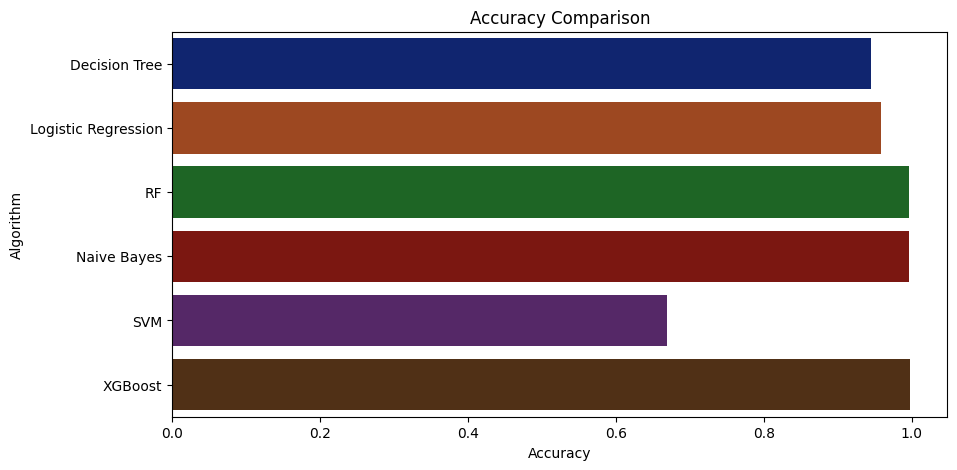

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

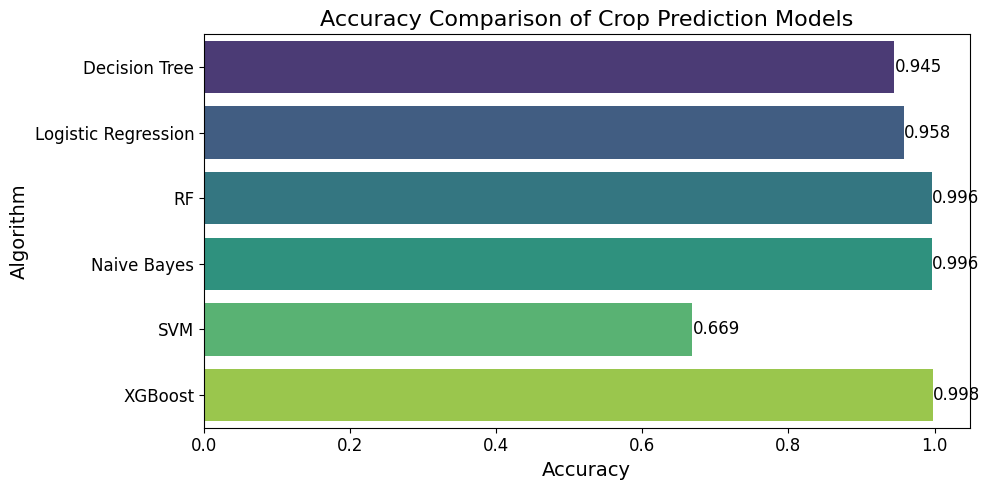

In [ ]:
# prompt: make the above graph better

import matplotlib.pyplot as plt
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison of Crop Prediction Models', fontsize=16)  # Larger title
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)

# Increase font size of x-axis tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


sns.barplot(x = acc,y = model,palette='viridis')  # Use a more visually appealing palette

# Add data labels to bars
for index, value in enumerate(acc):
  plt.text(value, index, str(round(value, 3)), ha='left', va='center', fontsize=12)

plt.tight_layout()  # Adjust spacing to prevent labels from overlapping
plt.show()


In [ ]:
# # prompt: different type of graph

# import matplotlib.pyplot as plt
# # @title Pair Plot
# sns.pairplot(new_df, hue='label')
# plt.show()

# # @title Box Plot for Multiple Features
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=new_df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
# plt.xticks(rotation=45)
# plt.title('Box Plot of Key Features')
# plt.show()


# # @title Violin Plot
# plt.figure(figsize=(12, 8))
# sns.violinplot(data=new_df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
# plt.xticks(rotation=45)
# plt.title('Violin Plot of Key Features')
# plt.show()


# # @title Correlation Matrix Heatmap (with different colormap)
# plt.figure(figsize=(10, 8))
# sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')  # Using 'coolwarm' colormap
# plt.title('Correlation Matrix Heatmap')
# plt.show()


# # @title Density Plot
# sns.kdeplot(data=new_df, x='temperature', hue='label', fill=True)
# plt.title('Density Plot of Temperature by Crop')
# plt.show()


# # @title Joint Plot
# sns.jointplot(data=new_df, x='temperature', y='humidity', kind='kde')
# plt.suptitle('Joint Distribution of Temperature and Humidity')
# plt.show()


Confusion Matrix:
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

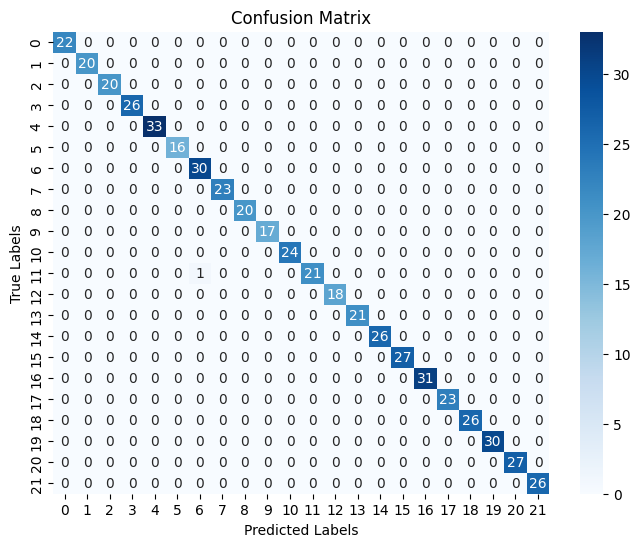

In [ ]:
# prompt: print confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your model and made predictions (Ytest and predicted_values)

cm = confusion_matrix(Ytest, predicted_values)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# prompt: reduce the amount of confusion in models

from sklearn.model_selection import GridSearchCV

# Define parameter grids for different models
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Perform Grid Search with cross-validation for each model

# Example for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(Xtrain, Ytrain)
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
best_dt = grid_search_dt.best_estimator_

# Similarly, perform grid search for other models:
# grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
# grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
# grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
# grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')

# Retrain the models with the best parameters found by Grid Search
# best_rf = grid_search_rf.best_estimator_
# best_lr = grid_search_lr.best_estimator_
# best_svm = grid_search_svm.best_estimator_
# best_xgb = grid_search_xgb.best_estimator_


# Evaluate the models with the best parameters to see if confusion has reduced
# predicted_values_best_dt = best_dt.predict(Xtest)
# print(classification_report(Ytest, predicted_values_best_dt))

# ... repeat for other models

# You can also try techniques like:
# - Feature engineering to create more informative features
# - Data augmentation to increase the size of the dataset
# - Ensemble methods to combine multiple models and reduce variance




Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
list2=[43, 45, 30, 18, 70.3, 7.0, 300.9]
str1=pred_array(list2)


select from the list of models to predict from:-
  1> Decision Tree - accuracy = 90.0 
  2> Logistic Regression - accuracy = 95.0 
  3> Random forest - accuracy = 99.0 
  4> NaiveBayes - accuracy = 99.0  
  5> Support vector machine - accuracy = 10.0 


enter the selected model number :-4
The selected model is GaussianNB()


The most suitable crop for your conditions are [18]


The most suitable crop for your conditions are ['pigeonpeas']


In [ ]:
!pip install together

In [ ]:
import os
from together import Together
str2= "Provide a detailed guide on how to grow " + str1 + " including specific treatments, preventative measures, and any relevant environmental factors."




In [ ]:
str2[0]

'Provide a detailed guide on how to grow Provide a detailed guide on how to grow pigeonpeas including specific treatments, preventative measures, and any relevant environmental factors. including specific treatments, preventative measures, and any relevant environmental factors.'

In [ ]:
client = Together(api_key=('064227b6f158ec7d8248690ab32012ce5ee0e87f5ef6d6d1646e91633c4c33cf'))

response = client.chat.completions.create(
    model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
    messages=[{"role": "user", "content": str2[0]}],
    max_tokens=512,
    temperature=0.7

)
print(response.choices[0].message.content)
result = ''
for choice in response.choices:
    result += choice.message.content
result = result.replace("*", "")

**Growing Pigeonpeas: A Detailed Guide**

Pigeonpeas (Cajanus cajan) are a type of legume that is widely cultivated in tropical and subtropical regions for its edible pods, seeds, and leaves. They are a good source of protein, fiber, and various minerals. Here's a step-by-step guide on how to grow pigeonpeas, including specific treatments, preventative measures, and relevant environmental factors.

**Climate and Soil Requirements**

Pigeonpeas require a warm and humid climate with temperatures between 25°C to 35°C (77°F to 95°F) for optimal growth. They can be grown in a variety of soils, but well-drained, fertile soils with a pH between 6.0 and 7.0 are ideal.

**Preparation of Seeds**

1. **Seed selection**: Choose high-quality seeds that are suitable for your region and climate.
2. **Seed treatment**: Treat the seeds with a fungicide or a mixture of carbendazim (50% w/w) and thiram (50% w/w) to prevent fungal diseases.
3. **Seed sowing**: Sow the seeds 2-3 cm (0.8-1.2 in) deep and 5-

In [ ]:
# prompt: convert the result which is in english to indian language using gtrans and later save and play the audio file

!pip install gTTS
from gtts import gTTS
import os

# Assuming 'result' contains the text you want to translate and convert to speech

# Install the googletrans library if you haven't already
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

translator = Translator()

try:
    # Detect the language of the input text (optional but recommended)
    detected_language = translator.detect(result).lang

    # Translate the text to Hindi (hi)
    translated_result = translator.translate(result, dest='hi').text

    # Create a gTTS object with the translated text and language
    tts = gTTS(text=translated_result, lang='hi')

    # Save the audio file
    tts.save("translated_audio.mp3")

    # Play the audio file (if you are in an environment where this is possible)
    os.system("mpg321 translated_audio.mp3")  # For Linux/macOS
    # Or use a different command for your operating system (e.g., 'afplay' for macOS, a specific player for Windows)

except Exception as e:
    print(f"An error occurred: {e}")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=4a277fd7f9b7cb0652c22a21d38026e1f41149377788b0d4d0587bdde3496316
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Suc

KeyboardInterrupt: 